In [16]:
#load sample data set 
import pandas as pd 
import numpy as np
import seaborn as sns 

In [17]:
# dataset path
file_path = 'data/salaries.csv'

# reading our dataset as a dataframe
df= pd.read_csv(file_path)

# taking a first look on our data
df.head()

,company,job,degree,salary_more_then_100k
0,google,sales executive,bachelors,0
1,google,sales executive,masters,0
2,google,business manager,bachelors,1
3,google,business manager,masters,1
4,google,computer programmer,bachelors,0


In [18]:
# df = pd.read_csv("salaries.csv")
# df.head()

In [19]:
X = df.drop('salary_more_then_100k',axis=1)
y = df['salary_more_then_100k']

In [20]:
X.head()

,company,job,degree
0,google,sales executive,bachelors
1,google,sales executive,masters
2,google,business manager,bachelors
3,google,business manager,masters
4,google,computer programmer,bachelors


In [21]:
y.head()

0    0
1    0
2    1
3    1
4    0
Name: salary_more_then_100k, dtype: int64

In [22]:
#converting catagories into dummies
from sklearn.preprocessing import LabelEncoder
X['company_n'] = LabelEncoder().fit_transform(X['company'])
X['job_n'] = LabelEncoder().fit_transform(X['job'])
X['degree_n'] = LabelEncoder().fit_transform(X['degree'])
X

,company,job,degree,company_n,job_n,degree_n
0,google,sales executive,bachelors,2,2,0
1,google,sales executive,masters,2,2,1
2,google,business manager,bachelors,2,0,0
3,google,business manager,masters,2,0,1
4,google,computer programmer,bachelors,2,1,0
5,google,computer programmer,masters,2,1,1
6,abc pharma,sales executive,masters,0,2,1
7,abc pharma,computer programmer,bachelors,0,1,0
8,abc pharma,business manager,bachelors,0,0,0
9,abc pharma,business manager,masters,0,0,1


In [23]:
X.columns

Index(['company', 'job', 'degree', 'company_n', 'job_n', 'degree_n'], dtype='object')

In [24]:
X= X.drop(['company', 'job', 'degree'],axis="columns")
X

,company_n,job_n,degree_n
0,2,2,0
1,2,2,1
2,2,0,0
3,2,0,1
4,2,1,0
5,2,1,1
6,0,2,1
7,0,1,0
8,0,0,0
9,0,0,1


In [25]:
X.head()



,company_n,job_n,degree_n
0,2,2,0
1,2,2,1
2,2,0,0
3,2,0,1
4,2,1,0


In [26]:
#machine learning algorithm
from sklearn.tree import DecisionTreeClassifier

#creat and fit our model
model= DecisionTreeClassifier().fit(X,y)


In [27]:
#Is salary of Google, Computer Engineer, Bachelors degree > 100 k ?

model.predict([[2,2,1]])

array([0], dtype=int64)

In [28]:
#Is salary of Google, Computer Engineer, Masters degree > 100 k ?

model.predict([[2,1,1]])


array([1], dtype=int64)

In [ ]:
# accuracy of model
#split data into test and train (80/20)%rule
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

X_train, X_test, y_train, y_test =train_test_split(X,y,test_size=0.2, random_state=1)

#creat a model
model.fit(X_train, y_train)

predicted_values =model.predict(X_test)
predicted_values


array([1, 1, 0, 0], dtype=int64)

In [ ]:
X_test.shape

(4, 3)

In [ ]:
#accuracy of the model
score = accuracy_score(y_test, predicted_values)
score

0.75

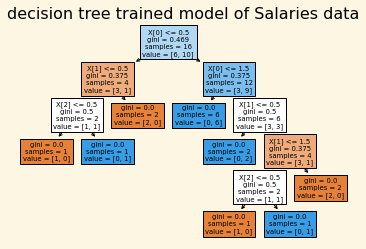

In [ ]:
from sklearn.tree import plot_tree
import matplotlib.pyplot as plt

plt.style.use("Solarize_Light2")
model = DecisionTreeClassifier().fit(X,y)
plot_tree(model, filled=True)
plt.title("decision tree trained model of Salaries data")
plt.show()